<a href="https://colab.research.google.com/github/adilsonsimiaoDK/StatisticToDS/blob/main/association_apriori.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

suport = number of records with x and y/total number of records: coffee and milk 

confidence = number of record with x and y/ number total of records. 

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
from apyori import apriori

In [ ]:
!pip install apyori

In [3]:
dataset = pd.read_csv('census.csv')

In [4]:
dataset.age.min(), dataset.age.max()

(17, 90)

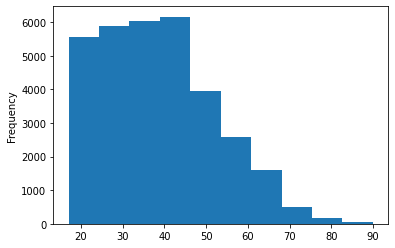

In [6]:
dataset.age.plot.hist()

In [7]:
dataset.age = pd.cut(dataset.age, bins=[0,17,25,40,60,80], labels=['range1','range2', 'range3', 'range4','range5'])


In [9]:
dataset.age.unique()

['range3', 'range4', 'range2', 'range5', 'range1', NaN]
Categories (5, object): ['range1' < 'range2' < 'range3' < 'range4' < 'range5']

In [20]:
dataset.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,range3,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,range4,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,range3,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,range4,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,range3,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [21]:
dataset_apriori = dataset[['age', 'workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex','native-country', 'income']]

In [22]:
dataset_apriori.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
0,range3,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,range4,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,range3,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,range4,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,range3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [23]:
dataset_apriori = dataset_apriori.sample(n=1000 )

In [35]:
transactions = []
for i in range(dataset_apriori.shape[0]):
  transactions.append([str(dataset_apriori.values[i,j])for j in range(dataset_apriori.shape[1])])



In [36]:
len(transactions) 

1000

In [37]:
transactions[:2]

[['range4',
  ' Self-emp-not-inc',
  ' 7th-8th',
  ' Divorced',
  ' Transport-moving',
  ' Not-in-family',
  ' White',
  ' Male',
  ' Cuba',
  ' <=50K'],
 ['range3',
  ' Private',
  ' Assoc-acdm',
  ' Divorced',
  ' Adm-clerical',
  ' Unmarried',
  ' White',
  ' Female',
  ' Poland',
  ' <=50K']]

In [43]:
rules =apriori(transactions, min_support = 0.3, min_confidence = 0.2)
result = list(rules)

In [44]:
result

[RelationRecord(items=frozenset({' <=50K'}), support=0.761, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({' <=50K'}), confidence=0.761, lift=1.0)]),
 RelationRecord(items=frozenset({' Female'}), support=0.334, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({' Female'}), confidence=0.334, lift=1.0)]),
 RelationRecord(items=frozenset({' HS-grad'}), support=0.334, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({' HS-grad'}), confidence=0.334, lift=1.0)]),
 RelationRecord(items=frozenset({' Husband'}), support=0.395, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({' Husband'}), confidence=0.395, lift=1.0)]),
 RelationRecord(items=frozenset({' Male'}), support=0.666, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({' Male'}), confidence=0.666, lift=1.0)]),
 RelationRecord(items=frozenset({' Married-civ-spouse'}), support=0